In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mlb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('dataset.csv')
df['bmi'] = df['bmi'].fillna(0)
df= df[df['bmi'] != 0]
df=df.drop(['id'], axis=1)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
print(df.columns)
selected=['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status','stroke']

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [4]:
for i in range(len(selected)):
    print(str(selected[i])+": "+str(df[selected[i]].unique()))

gender: ['Male' 'Female' 'Other']
hypertension: [0 1]
heart_disease: [1 0]
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
stroke: [1 0]


In [5]:
print('Age: '+str(df['age'].min())+'-'+str(df['age'].max()))
print('Average Glucose Level: '+str(df['avg_glucose_level'].min())+'-'+str(df['avg_glucose_level'].max()))
print('BMI: '+str(df['bmi'].min())+'-'+str(df['bmi'].max()))

Age: 0.08-82.0
Average Glucose Level: 55.12-271.74
BMI: 10.3-97.6


(array([0, 1, 2]),
 [Text(0, 0, 'Male'), Text(1, 0, 'Female'), Text(2, 0, 'Other')])

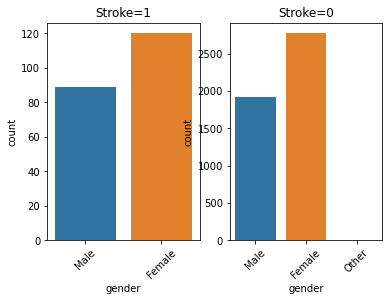

In [6]:
plt.subplot(1,2,1)
plt.title('Stroke=1')
ax1 = sns.countplot(x="gender", data=df[df["stroke"]==1])
plt.xticks(rotation=45)
plt.subplot(1,2,2)
plt.title('Stroke=0')
ax2 = sns.countplot(x="gender", data=df[df["stroke"]==0])
plt.xticks(rotation=45)

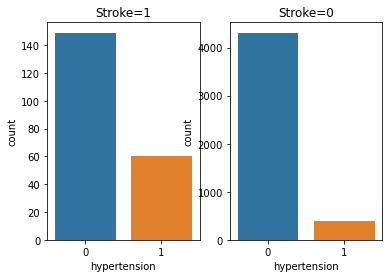

In [7]:
plt.subplot(1,2,1)
plt.title('Stroke=1')
ax1 = sns.countplot(x="hypertension", data=df[df["stroke"]==1])

plt.subplot(1,2,2)
plt.title('Stroke=0')
ax2 = sns.countplot(x="hypertension", data=df[df["stroke"]==0])

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

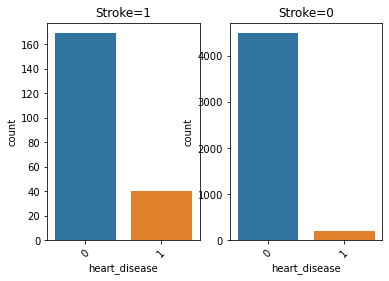

In [8]:
plt.subplot(1,2,1)
plt.title('Stroke=1')
ax1 = sns.countplot(x="heart_disease", data=df[df["stroke"]==1])
plt.xticks(rotation=45)
plt.subplot(1,2,2)
plt.title('Stroke=0')
ax2 = sns.countplot(x="heart_disease", data=df[df["stroke"]==0])
plt.xticks(rotation=45)

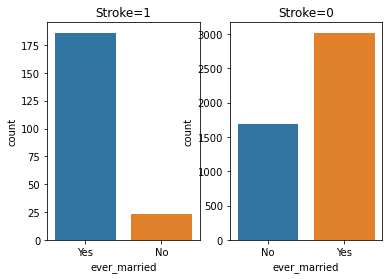

In [9]:
plt.subplot(1,2,1)
plt.title('Stroke=1')
ax1 = sns.countplot(x="ever_married", data=df[df["stroke"]==1])

plt.subplot(1,2,2)
plt.title('Stroke=0')
ax2 = sns.countplot(x="ever_married", data=df[df["stroke"]==0])


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'children'),
  Text(1, 0, 'Private'),
  Text(2, 0, 'Never_worked'),
  Text(3, 0, 'Self-employed'),
  Text(4, 0, 'Govt_job')])

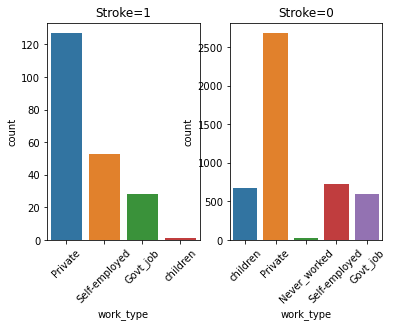

In [10]:
plt.subplot(1,2,1)
plt.title('Stroke=1')
ax1 = sns.countplot(x="work_type", data=df[df["stroke"]==1])
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.title('Stroke=0')
ax2 = sns.countplot(x="work_type", data=df[df["stroke"]==0])
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, 'Rural'), Text(1, 0, 'Urban')])

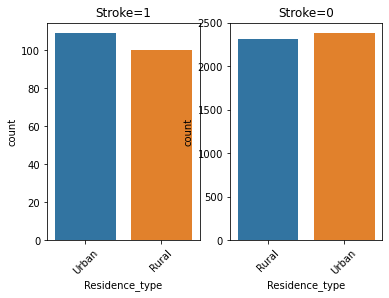

In [11]:
plt.subplot(1,2,1)
plt.title('Stroke=1')
ax1 = sns.countplot(x="Residence_type", data=df[df["stroke"]==1])
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.title('Stroke=0')
ax2 = sns.countplot(x="Residence_type", data=df[df["stroke"]==0])
plt.xticks(rotation=45)

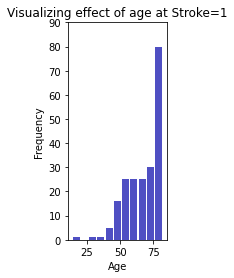

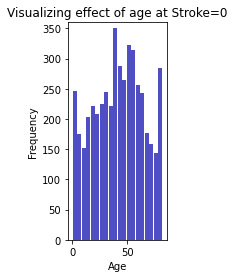

In [12]:
plt.subplot(1,3,1)
n, bins, patches = plt.hist(x=df[df["stroke"]==1]["age"], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Visualizing effect of age at Stroke=1')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

plt.subplot(1,3,2)
n, bins, patches = plt.hist(x=df[df["stroke"]==0]["age"], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Visualizing effect of age at Stroke=0')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

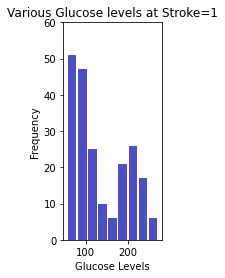

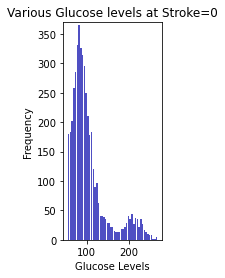

In [13]:
plt.subplot(1,3,1)
n, bins, patches = plt.hist(x=df[df["stroke"]==1]["avg_glucose_level"], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.xlabel('Glucose Levels')
plt.ylabel('Frequency')
plt.title('Various Glucose levels at Stroke=1')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

plt.subplot(1,3,2)
n, bins, patches = plt.hist(x=df[df["stroke"]==0]["avg_glucose_level"], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.xlabel('Glucose Levels')
plt.ylabel('Frequency')
plt.title('Various Glucose levels at Stroke=0')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

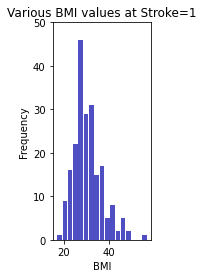

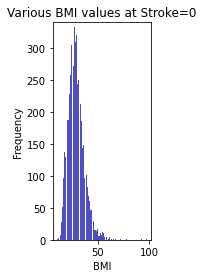

In [14]:
plt.subplot(1,3,1)
n, bins, patches = plt.hist(x=df[df["stroke"]==1]["bmi"], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Various BMI values at Stroke=1')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

plt.subplot(1,3,2)
n, bins, patches = plt.hist(x=df[df["stroke"]==0]["bmi"], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Various BMI values at Stroke=0')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

In [15]:
df_final=df
df_final=df_final.drop(['gender','smoking_status','work_type','Residence_type','ever_married'],axis=1)
df_final

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1
5,81.0,0,0,186.21,29.0,1
...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,0
5106,81.0,0,0,125.20,40.0,0
5107,35.0,0,0,82.99,30.6,0
5108,51.0,0,0,166.29,25.6,0


In [16]:
df_final

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1
5,81.0,0,0,186.21,29.0,1
...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,0
5106,81.0,0,0,125.20,40.0,0
5107,35.0,0,0,82.99,30.6,0
5108,51.0,0,0,166.29,25.6,0


In [17]:
gender = pd.get_dummies(df['gender'], prefix='gender')
smoking_status = pd.get_dummies(df['smoking_status'], prefix='smoking_status')
work_type = pd.get_dummies(df['work_type'], prefix='work_type')
Residence_type = pd.get_dummies(df['Residence_type'], prefix='Residence_type')
ever_married = pd.get_dummies(df['ever_married'], prefix='ever_married')
df_final = pd.merge(df_final, gender, left_index=True, right_index=True)
df_final = pd.merge(df_final, work_type, left_index=True, right_index=True)
df_final = pd.merge(df_final, smoking_status, left_index=True, right_index=True)
df_final = pd.merge(df_final, Residence_type, left_index=True, right_index=True)
df_final = pd.merge(df_final, ever_married, left_index=True, right_index=True)
df_final

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,...,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Rural,Residence_type_Urban,ever_married_No,ever_married_Yes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
2,80.0,0,1,105.92,32.5,1,0,1,0,0,...,0,0,0,0,1,0,1,0,0,1
3,49.0,0,0,171.23,34.4,1,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,0,...,1,0,0,0,1,0,1,0,0,1
5,81.0,0,0,186.21,29.0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,0,1,0,0,0,...,0,1,1,0,0,0,1,0,1,0
5106,81.0,0,0,125.20,40.0,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,1
5107,35.0,0,0,82.99,30.6,0,1,0,0,0,...,1,0,0,0,1,0,1,0,0,1
5108,51.0,0,0,166.29,25.6,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1


In [18]:
y=np.array(list(df_final['stroke']))
df_final=df_final.drop(['stroke'],axis=1)

In [19]:
df_final

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,...,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Rural,Residence_type_Urban,ever_married_No,ever_married_Yes
0,67.0,0,1,228.69,36.6,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
2,80.0,0,1,105.92,32.5,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,1
3,49.0,0,0,171.23,34.4,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
4,79.0,1,0,174.12,24.0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,1
5,81.0,0,0,186.21,29.0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,1,0,0,0,0,...,0,1,1,0,0,0,1,0,1,0
5106,81.0,0,0,125.20,40.0,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,1
5107,35.0,0,0,82.99,30.6,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,1
5108,51.0,0,0,166.29,25.6,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [20]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

In [21]:
columns=['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'gender_Other', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes',
       'Residence_type_Rural', 'Residence_type_Urban', 'ever_married_No',
       'ever_married_Yes']
X=df_final[columns]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3927, 21)
X_test shape: (982, 21)
y_train shape: (3927,)
y_test shape: (982,)


In [24]:
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
count=0
for i in range(len(y_test)):
    if y_pred[i]==y_test[i]:
        count+=1
print(count*100/len(y_pred))

94.60285132382892


In [25]:
from sklearn.metrics import confusion_matrix
res=confusion_matrix(y_pred, y_test)
res

array([[929,  53],
       [  0,   0]], dtype=int64)

In [26]:
TN=res[1][1]
TP=res[0][0]
FN=res[1][0]
FP=res[0][1]
print(TP,FP,FN,TN)

929 53 0 0


In [27]:
Sensitivity=(TP)/(TP+FN)
Specificity=(TN)/(TN+FP)
Precision=(TP)/(TP+FP)
Recall=(TP)/(TP+FN)
Accuracy=(TP+TN)/(TP+TN+FP+FN)
f1=2*(Precision*Recall)/(Precision+Recall)

print('Sensitivity: '+str(Sensitivity))
print('Specificity: '+str(Specificity))
print('Precision: '+str(Precision))
print('Recall: '+str(Recall))
print('f1: '+str(f1))
print('Accuracy: '+str(Accuracy))

Sensitivity: 1.0
Specificity: 0.0
Precision: 0.9460285132382892
Recall: 1.0
f1: 0.9722658294086864
Accuracy: 0.9460285132382892


In [28]:
# K-means Clustering

In [29]:
import sklearn
from sklearn.cluster import KMeans

In [30]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_final[columns],y_train)
    sse.append(km.inertia_)

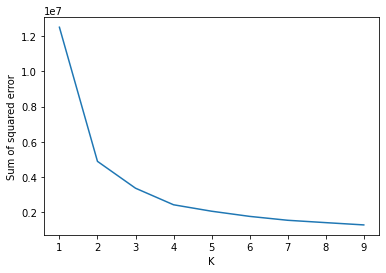

In [31]:
#elbow plot
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [32]:
KMeans_Clustering = KMeans(n_clusters =2, random_state=42)
KMeans_Clustering.fit(X_train)

KMeans(n_clusters=2, random_state=42)

In [33]:
print(KMeans_Clustering.cluster_centers_)

[[ 4.02612589e+01  6.73990499e-02  3.35510689e-02  8.94827821e+01
   2.82233670e+01  6.01247031e-01  3.98456057e-01  2.96912114e-04
   1.27375297e-01  5.34441805e-03  5.72743468e-01  1.41627078e-01
   1.52909739e-01  3.22149644e-01  1.55878860e-01  3.72624703e-01
   1.49346793e-01  4.94952494e-01  5.05047506e-01  3.80938242e-01
   6.19061758e-01]
 [ 5.78120215e+01  2.45080501e-01  1.34168157e-01  2.00527406e+02
   3.24576029e+01  5.40250447e-01  4.59749553e-01 -3.79470760e-19
   1.52057245e-01  1.78890877e-03  5.84973166e-01  2.30769231e-01
   3.04114490e-02  1.80679785e-01  2.45080501e-01  4.27549195e-01
   1.46690519e-01  4.97316637e-01  5.02683363e-01  1.37745975e-01
   8.62254025e-01]]


In [34]:
#prediction using kmeans and accuracy
kpred = KMeans_Clustering.predict(X_test)
print('Classification report:\n\n', sklearn.metrics.classification_report(y_test,kpred))

Classification report:

               precision    recall  f1-score   support

           0       0.96      0.87      0.91       929
           1       0.12      0.30      0.17        53

    accuracy                           0.84       982
   macro avg       0.54      0.58      0.54       982
weighted avg       0.91      0.84      0.87       982



In [35]:
res1=confusion_matrix(y_test, kpred)
res1

array([[806, 123],
       [ 37,  16]], dtype=int64)

In [36]:
TN=res1[1][1]
TP=res1[0][0]
FN=res1[1][0]
FP=res1[0][1]
print(TP,FP,FN,TN)

806 123 37 16


In [37]:
Sensitivity=(TP)/(TP+FN)
Specificity=(TN)/(TN+FP)
Precision=(TP)/(TP+FP)
Recall=(TP)/(TP+FN)
Accuracy=(TP+TN)/(TP+TN+FP+FN)
f1=2*(Precision*Recall)/(Precision+Recall)

print('Sensitivity: '+str(Sensitivity))
print('Specificity: '+str(Specificity))
print('Precision: '+str(Precision))
print('Recall: '+str(Recall))
print('f1: '+str(f1))
print('Accuracy: '+str(Accuracy))

Sensitivity: 0.9561091340450771
Specificity: 0.11510791366906475
Precision: 0.8675995694294941
Recall: 0.9561091340450771
f1: 0.909706546275395
Accuracy: 0.8370672097759674
